**Objectifs :** 


*   Mettre en équation la trajectoire de l’outil d’un bras articulé à 2 ddl 
*   Résoudre un problème inverse 
*   Utiliser scipy.optimize pour résoudre un système d’équations non linéaires
*   Programmer et comparer différentes méthodes pour résoudre le système d’équations non linéaires par minimisation du résidu du système

**Introduction :** 
L'une des problematique les plus abordé dans le domaine de la robotique est la resolution du modele geometrique inverse, ce qui veut dire trouver les coordonees articulaires  d'un robot qui des coordonnées cartesienne de l'organe terminale donnée. 
On considère le bras articulé à 2 degrés de liberté se comportant de deux segments L1 et L2. La positions de l'organe terminale P(x,y) est pilotée par les angles des articulations $theta1$ et $theta2$.
Notre objectif a travers ce projet et de resoudre le probleme inverse du bras articulé, d'abord par resolution du systeme d'equation puis en retrouvant les configurations articulaires ($theta1$ et $theta2$) pour une trajectoire $P[x(t),y(t)]$ , qui minimisent le residu du systeme.




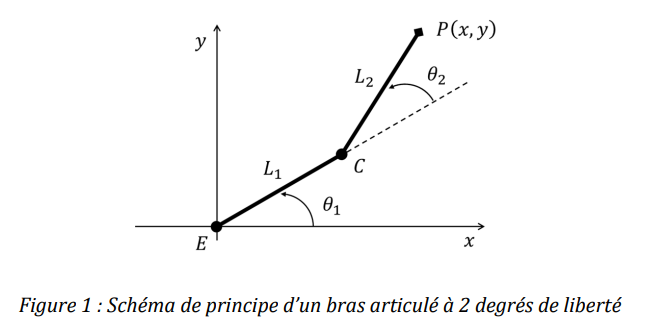

**Equation du modele geometrique directe :**

On definit $X$ le vecteur de positions de l'organe terminal P $X= F(\theta) $ 

$
F(\theta) = 
\begin{pmatrix}
L1 cos	\theta1 + L2 cos(	\theta1 + 	\theta2) \\
L1 sin	\theta1 + L2 sin(	\theta1 + 	\theta2)
\end{pmatrix}$

**Equation du résidu :**

On definit le résidu comme suit : $R(\theta)= F(\theta)-X$

$
R(\theta) = 
\begin{pmatrix}
L1 cos	\theta1 + L2 cos(	\theta1 + 	\theta2) - x\\
L1 sin	\theta1 + L2 sin(	\theta1 + 	\theta2) - y
\end{pmatrix}$

In [1]:
import numpy as np
from scipy import optimize 
import matplotlib.pyplot as plt
from Functions import *
from Gradient import  *
from Newton import *
from Graphics import *
from Interface import * 
import time



In [2]:
# Definition des longueurs des deux segments L1 et L2 du robot
L1 = 3
L2 = 3
# Vecteur de parametres  
Params = [L1,L2,None] # La troisieme valeur de Params est le vecteur de la position desirée X

##  2) Fonction Root : 
Pour trouver les coordonnées articulaire pour une position donnée on retrouves les racines de la fonction de résidu $R$.
Pour cela on utilise la fonction $Root$ de la librairie $scipy.optimise$.  
Le package scipy.optimize fournit plusieurs algorithmes d'optimisation couramment utilisés. La fonction Root est utilisé pour calculer les racines d'un systeme d'equations non lineaires à l'aide de diverses méthodes de résolution (la methode hybr (méthode par defaut),lm, broyden1, broyden2, etc..) 

Elle prend en entrée la fonction à minimiser (dans notre cas le résidu $R$) et une estimation initiale des solutions.  Elle renvoit un objet OptimizeResult qui a comme attributs : x : un tableau de solutions et success : un indicateur booléen indiquant si l'algorithme s'est terminé avec succès.

On applique cette méthode pour le point definit précédemment $X=[2,1]$

In [18]:
# Methode 1 : Root

#Definition du point désiré
X=[2,1]
Params[2]=X
#Definition de la configuration initiale/estimation de la solution
init_config=[np.pi/4,np.pi/4]

print("Methode Root : ")
rt=optimize.root(R, init_config,args = Params, jac=False)
#test si la fonction trouve une sollution avec succés
if rt.success==True:
    print(f"Les angles optimaux = {rt.x} \nModéle geometrique direct (X,Y) ={F(L1,L2,rt.x[0],rt.x[1])}")
else:
    print("Point non atteignable")

Methode Root : 
Les angles optimaux = [-0.72525547  2.37780616] 
Modéle geometrique direct (X,Y) =[2. 1.]


**Verification des solutions obtenu:**   
Pour verifier nos solutions on utilise le modele geometrique direct du robot et verifie si la position demandé est atteinte en utilisant les coordonnées articulaires retrouvées par nos méthodes de resolutions.

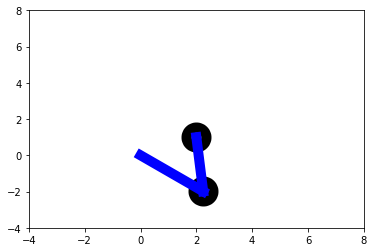

In [5]:
animate(rt.x,Params)

##  2) Fonction minimize : 
Une autre méthode de résolution est d'utiliser la fonction minimize fournie par libraire scipy également. Elle permet de retrouver les solutions qui minimisent une fonction vecteur d'une ou plusieurs variables.  
Comme la fonction root, cette fonction prend en entrée la fonction à minimiser et une estimation initiale des solutions.Elle renvoit un objet OptimizeResult qui a comme attributs : x : un tableau de solutions et success : un indicateur booléen indiquant si l'algorithme s'est terminé avec succès.

On l'applique pour minimiser le carré de la norme du résidu. 

In [20]:
# Methode 2 : minimize
#Definition du point désiré
X=[2,1]
Params[2]=X
#Definition de la configuration initiale/estimation de la solution
init_config=[np.pi/4,np.pi/4]

print("Methode Root : ")
min_R_norm=optimize.minimize(R_norm, init_config,args = Params, jac=False)
#test si la fonction trouve une sollution avec succés
if min_R_norm.success==True:
    print(f"Les angles optimaux = {min_R_norm.x} \nModéle geometrique direct  (X,Y) ={F(L1,L2,min_R_norm.x[0],min_R_norm.x[1])}")
else:
    print("Point non atteignable")

Methode Root : 
Les angles optimaux = [-0.72525552  2.37780607] 
Modéle geometrique direct  (X,Y) =[2.00000032 0.99999992]


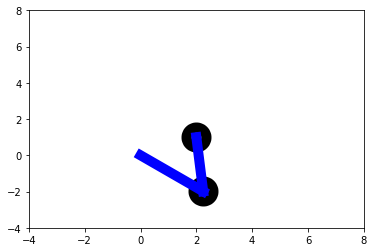

In [8]:
animate(min_R_norm.x,Params)

**Mise en garde avant l'utilisation des methodes de resolutions** :  

**Domaine atteignable:**   
Les fonctions root et minimize renvoient $success=False$ lorsque une solution n'existe pas. 
Ceci est du à la contraire physique du robot qui est limité par son domaine opperationnel.  
La condition sur les positions est definit comme suit :   
$$(L1 - L2)^2 \leq x^2 + y^2 \leq ( L1 + L2 )^2 $$

### Existence de deux solutions: 

Le modele geometrique Inverse d'un robot 2R possede deux solutions possible pour chaque position. Cependant, nos methodes de resolution ne renvoient qu'une seule des deux solutions. 

* Pour illustrer cela on definit une position desiré dans l'espace cartesien $\vec X = [2,1] $. 
Pour avoir une vue detaillé de comment la fonction $R_{norm}$ varies avec $\theta$ on trace les isovaleurs de la fonction $R_{norm}$  pour la position $X$ comme suit : 

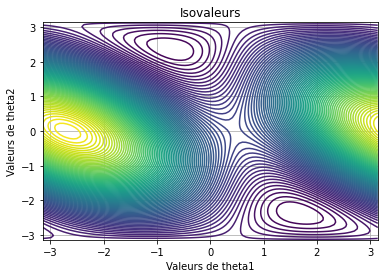

In [9]:
# Definition du point desiré 
X = np.array([2,1])
# Nombre des isovaleurs dans le trancé de Rnorm
nIso = 100 ; 
nx,ny = 100 , 100 
Params[2]= X
# Tracé des Isovaleurs de Rnorm
isoValeurs (Params,nx,ny, nIso)

On constate l'excistence de deux minimums sur le tracé des isovaleur du module du residu ($R_{norm}$) ce qui veut dire que pour la position de l'organe terminal choisie, il existe deux configurations articulaires possible pour atteindre ce point.

 # Interpolation de Trajectoire 
 
La fonction **Interp** permet de definir une trajectoire à suivre par le robot par interpolation. Elle peut soit etre cubic sois etre linéaire.

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

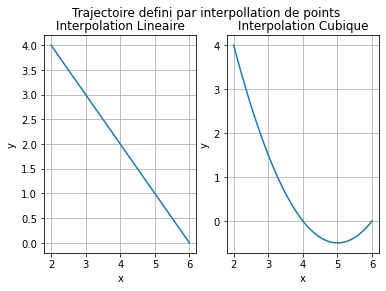

In [11]:
#Interpolation Lineaire
Xf=[2,4]
Xi=[6,0]
N=50
xl,yl=Interp(Xi,Xf,N)
# Interpolation cubic
Xic = [2,4]
Xfc = [6,0]
Xmc = [3,1.5]
xc,yc=Interp(Xic,Xfc,N,traj="Cube",Xm=Xmc)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Trajectoire defini par interpollation de points')
ax1.plot(xl, yl)
ax1.set_title("Interpolation Lineaire")
ax1.grid()
ax2.plot(xc, yc)
ax2.grid()
ax2.set_title("Interpolation Cubique")
ax1.set(xlabel='x', ylabel='y')
ax2.set(xlabel='x', ylabel='y')

## Interpolation de Trajectoire avec les fonctions Root et Minimize
On applique les fonctions pour une suite de points representant une trajectoire soit lineaire ou cubique.

Comme expliqué précédemment Le modele geometrique Inverse qu'on cherche à resourdre possede deux solutions possible pour chaque position.Le choix d'une des solutions est influencé par le choix des estimation initiales de solutions.Pour eviter que notre robot fasse des mouvements brusques/incoherents lors de la suivie d'une trajectoire, on fixe l'estimation initiales de solutions à la solution de la position précedante.

**Exemple 01:** 
Interpolation lineaire avec la fonction Root

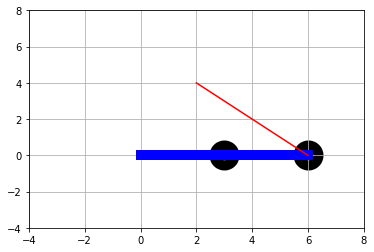

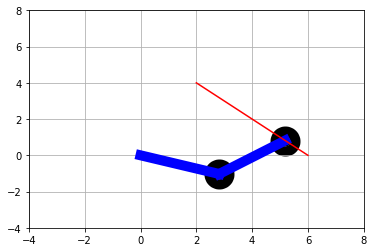

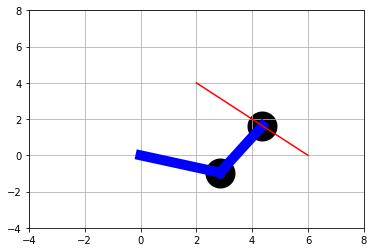

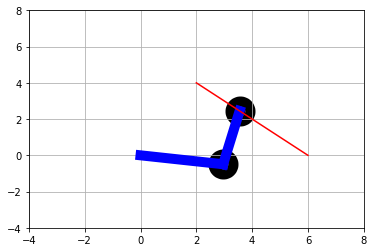

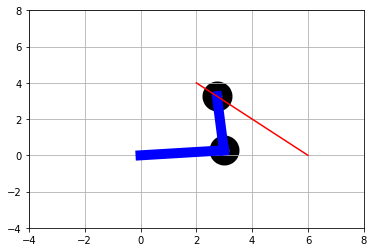

In [13]:
#Interpolation lineaire
Xi=[6,0] 
Xf=[2,4]
N=50
x,y=Interp(Xi,Xf,N)

#configuration initiale
X=[x[0],y[0]]
#estimation initiale de la 1ere solution
ConfigInit= [-2,0] 
ConfigAct = ConfigInit

# Nombre de points les calculs sont fait avant que le robot sois afficher le robot
ptAfficher = 10 

fig = plt.figure()
for i in  range(N):     
    X=[x[i],y[i]]
    Params[2] = X
    Solution=optimize.root(R,ConfigAct,args=Params, jac=False)
    if (i % ptAfficher == 0 ):       
        animate(Solution.x,Params)
        plt.plot(x,y,'r', label = 'droite')
        plt.grid()
        plt.show()
    ConfigAct = Solution.x

**Exemple 02:** 
Interpolation cubique avec la fonction minimize

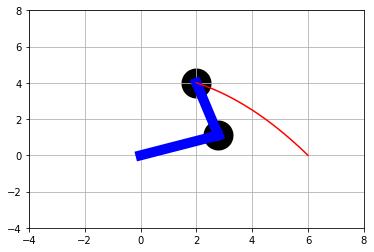

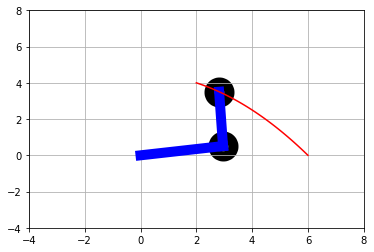

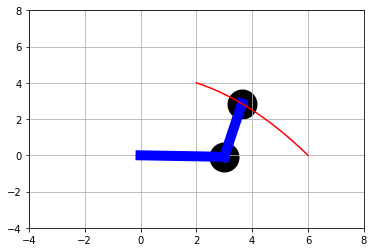

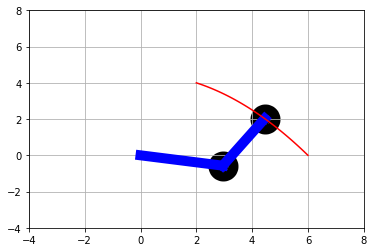

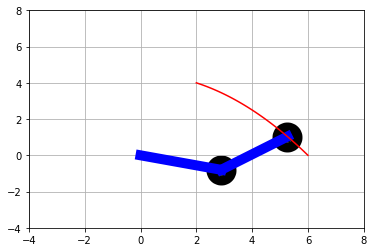

In [14]:
#Interpolation cubique
Xic = [2,4]
Xfc = [6,0]
Xmc = [4,2.5]
xc,yc=Interp(Xic,Xfc,N,traj="Cube",Xm=Xmc)
#configuration initiale
X=[xc[0],yc[0]]
#estimation initiale de la 1ere solution
ConfigInit= [-2,0] 
ConfigAct = ConfigInit

# Nombre de points les calculs sont fait avant que le robot sois afficher le robot
ptAfficher = 10 

fig = plt.figure()
for i in  range(N):     
    X=[xc[i],yc[i]]
    Params[2] = X
    Solution=optimize.minimize(R_norm,ConfigAct,args=Params)
    if (i % ptAfficher == 0 ):       
        animate(Solution.x,Params)
        plt.plot(xc,yc,'r', label = 'cubique')
        plt.grid()
        plt.show()
    ConfigAct = Solution.x

# 3) Gradient a pas fixe

La méthode du gradient est une méthode d’analyse numérique permettant de trouver un extremum (qui peut être local) d’une fonction à plusieurs variables sans contraintes. 
Dans notre projet on sera amené a utiliser la methodes du gradient pour trouver les angles minimisant la distance de l'organe terminale d'un robot et d'un point defini dans l'espace cartésien (fonction residu).
Aprés avoir matthematiquement modeliser le robot, le probleme posé est de minimiser la norm au carré de la fonction residu precedemment defini : $R_{norm}(\theta) = \lVert R(\theta)\rVert ^ 2 $ definir sur $ R^2 $ avec $\theta = [\theta_1 , \theta_2]$ les positions articulaire du robot.
La fonction $R_{norm}(\theta)$ étant différentiable à l’ordre 1, la methode du gradient permet de generer une suite de points \theta_n tel que :   
$$  \forall n R_{norm}(\theta_{n+1}) <R_{norm}(\theta_n)) $$ 

Pour minimiser $R_{norm}$ il suffit de chercher un nouveau point en se deplacant d'une certaine quantité dans la direction de opposé du gradient de $R_{norm} (\vec\nabla R_{norm}$) . 

Le schema generale de l'algorithme du gradient a pas fixe est decrit pas l'equation suivante : 
$$  X_{n+1} = X_n - \alpha \nabla R_{norm}(X_n) \quad avec \quad R_{norm}(\theta_{n+1} <R_{norm}(\theta_n)) $$
avec  : 

<table border="0">  <tr>    <tr>     <td>$$
\nabla ||R(\theta)||^{2}=
\begin{pmatrix}
\frac{\partial ||R(\theta)||^{2}}{\partial \theta_{1}}\\
\frac{\partial ||R(\theta)||^{2}}{\partial \theta_{2}}
\end{pmatrix}
$$</td>     <td>$$
 =\begin{pmatrix}
2x(L1sin(\theta_{1})+L2sin(\theta_{1}+\theta_{2}))-2y(L1cos(\theta_{1})+L2cos(\theta_{1}+\theta_{2}))\\
-2L1L2sin(\theta_{2})+2xL2sin(\theta_{1}+\theta_{2})-2yL2.cos(\theta_{1}+\theta_{2})
\end{pmatrix}
$$</td>  </tr> </table>
$\alpha$ est constant au cours des itérations. Le pas de déplacement étant proportionnel au module du gradient, il diminue automatiquement au voisinage du minimum et on peut espérer converger vers la solution, à condition de choisir la bonne valeur de 𝛼.
Pour un 𝛼 trés grand l'algorithm peut osciller autour de la solution sans jamais converger, et un 𝛼 trés petit nous assurera de converger vers la solution mais la methode deviens vite trés couteuse (Nombre d'iteration trés elevés).

### Implementation de la méthode du gradient à pas fixe :
* On definit une position desiré dans l'espace cartesien $\vec X = [2,1] $  
On implemente l'algorithme du gradient a pas optimal avec une configuration initiale $ \theta = [\pi/4 ,\pi/4]$

 Iterations : 1 	 alpha = 0.05 	 dX = 0.8129471800465795
 Iterations : 2 	 alpha = 0.05 	 dX = 0.4515481953307078
 Iterations : 3 	 alpha = 0.05 	 dX = 0.4295175833058964
 Iterations : 4 	 alpha = 0.05 	 dX = 0.37867138951615015
 Iterations : 5 	 alpha = 0.05 	 dX = 0.2575421714287201
 Iterations : 6 	 alpha = 0.05 	 dX = 0.14331299262215608
 Iterations : 7 	 alpha = 0.05 	 dX = 0.07749997387254273
 Iterations : 8 	 alpha = 0.05 	 dX = 0.04418164346435653
 Iterations : 9 	 alpha = 0.05 	 dX = 0.02610412500829618
 Iterations : 10 	 alpha = 0.05 	 dX = 0.01572186232539998
 Iterations : 11 	 alpha = 0.05 	 dX = 0.009576701562187711
 Iterations : 12 	 alpha = 0.05 	 dX = 0.005873809401199143
 Iterations : 13 	 alpha = 0.05 	 dX = 0.003617918377131137
 Iterations : 14 	 alpha = 0.05 	 dX = 0.002234229616122271
 Iterations : 15 	 alpha = 0.05 	 dX = 0.0013819573914667042
 Iterations : 16 	 alpha = 0.05 	 dX = 0.0008556439355246434
Minimum trouve apres 16 iterations
les angles optimaux = [-0.

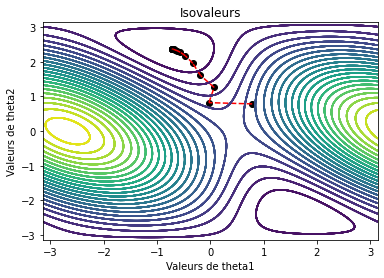

In [10]:
# Configuration articulaire initialle du robot 
ConfigInit =[np.pi/4,np.pi/4]
#Definition de la valeur du pas de l'algorithme du griadient a pas fixe 
aplha_init = 0.05
# Calcule du minimum de la fonction Rnorm
resultat , converge = GradienDecent(ConfigInit,aplha_init,Params,10e-4,100,IsoV=True,Disp=True) 

print(f"les angles optimaux = {resultat} \nLe point (X,Y) = {F(L1,L2,resultat[0],resultat[1])}")

La configuration articulaire du robot est montré ci-dessous :

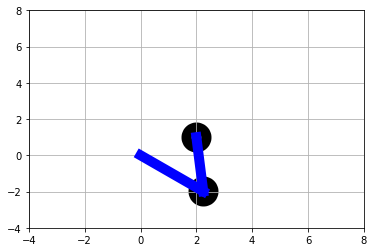

In [5]:
# La fonction animate permet d'afficher une representation graphique du robot a partir de configuration articulaire
animate(resultat,Params)
plt.grid()

* On reprend l'exemple precedent avec une valeur de alpha plus grande  ($\alpha = 0.1$).


In [6]:
# Configuration articulaire initialle du robot 
ConfigInit =[np.pi/4,np.pi/4]
#Definition de la valeur du pas de l'algorithme du griadient a pas fixe 
aplhaInit = 0.1
# Calcule du minimum de la fonction Rnorm
resultat , converge = GradienDecent(ConfigInit,aplhaInit,Params,10e-4,100,Disp=True) 

print(f"les angles optimaux = {resultat} \nLe point X = {F(L1,L2,resultat[0],resultat[1])}")


 Iterations : 1 	 alpha = 0.1 	 dX = 1.625894360093159
 Iterations : 2 	 alpha = 0.1 	 dX = 2.6938288474597973
 Iterations : 3 	 alpha = 0.1 	 dX = 0.9998110842310913
 Iterations : 4 	 alpha = 0.1 	 dX = 0.6823706457291661
 Iterations : 5 	 alpha = 0.1 	 dX = 0.5639312339639075
 Iterations : 6 	 alpha = 0.1 	 dX = 0.28294325845070917
 Iterations : 7 	 alpha = 0.1 	 dX = 0.2468783936432425
 Iterations : 8 	 alpha = 0.1 	 dX = 0.2396249479859034
 Iterations : 9 	 alpha = 0.1 	 dX = 0.2397133119545521
 Iterations : 10 	 alpha = 0.1 	 dX = 0.24089281789986547
 Iterations : 11 	 alpha = 0.1 	 dX = 0.24205757927123903
 Iterations : 12 	 alpha = 0.1 	 dX = 0.24351230317429196
 Iterations : 13 	 alpha = 0.1 	 dX = 0.24459436468681303
 Iterations : 14 	 alpha = 0.1 	 dX = 0.24588495529226256
 Iterations : 15 	 alpha = 0.1 	 dX = 0.24682244254005392
 Iterations : 16 	 alpha = 0.1 	 dX = 0.2479367145411524
 Iterations : 17 	 alpha = 0.1 	 dX = 0.24874096383640734
 Iterations : 18 	 alpha = 0.1 	 

Avec cette valeurs de alpha on constate que l'algorithme oscille autour de la solution sans y converger et ca meme pour un nombre d'iterations plus elevés.

* Pour amelierer l'algortihme du gradient a pas fixe, on ajuste la valeur de alpha en le divisant sur deux si $  R_{norm}(\theta_{n+1}) > R_{norm}(\theta_n)) $ qui permet de garantir la convergence.

 Iterations : 1 	 alpha = 0.05 	 dX = 1.625894360093159
 Iterations : 2 	 alpha = 0.1 	 dX = 1.3469144237298987
 Iterations : 3 	 alpha = 0.1 	 dX = 0.9441137369478272
 Iterations : 4 	 alpha = 0.05 	 dX = 0.3012079174441514
 Iterations : 5 	 alpha = 0.1 	 dX = 0.14718983497074895
 Iterations : 6 	 alpha = 0.1 	 dX = 0.029237375260530284
 Iterations : 7 	 alpha = 0.05 	 dX = 0.025205619963255037
 Iterations : 8 	 alpha = 0.1 	 dX = 0.012920661390454079
 Iterations : 9 	 alpha = 0.1 	 dX = 0.0007323899315723433
Minimum trouve apres 9 iterations
les angles optimaux = [-0.72499566  2.37787387] 
Le point X = [1.99953767 1.00050294]


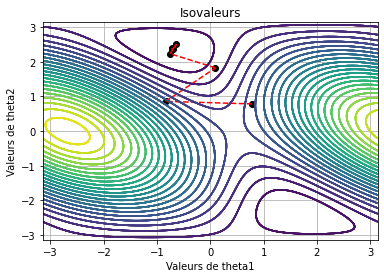

In [7]:
# Configuration articulaire initialle du robot 
ConfigInit =[np.pi/4,np.pi/4]
#Definition de la valeur initialle du pas de l'algorithme du griadient a pas fixe 
aplhaInit = 0.1
# Calcule du minimum de la fonction Rnorm
resultat , converge = GradienDecentAmeliore(ConfigInit,aplhaInit,Params,10e-4,100,IsoV=True,Disp=True)
print(f"les angles optimaux = {resultat} \nLe point X = {F(L1,L2,resultat[0],resultat[1])}")

En utilisant cette methode on remarque que le gradient converge, avec un nombre d'iterations moins important que pour une valeur fixe de $\alpha = 0.05 $.

* On redefinit une configuration articulaire initialle du robot $ \theta = [0 ,-\pi/2]$, on constate que le l'lagorithme diverge vers la deuxieme solution des deux angles articulaires qui minimise la fonction $R_{norm}$.

 Iterations : 1 	 alpha = 0.1 	 dX = 1.8973665961010278
 Iterations : 2 	 alpha = 0.05 	 dX = 0.5816120882949123
 Iterations : 3 	 alpha = 0.1 	 dX = 0.27181243248679654
 Iterations : 4 	 alpha = 0.1 	 dX = 0.11468255206256676
 Iterations : 5 	 alpha = 0.05 	 dX = 0.10906009475936672
 Iterations : 6 	 alpha = 0.1 	 dX = 0.055758149313773785
 Iterations : 7 	 alpha = 0.1 	 dX = 0.0032362748245201496
 Iterations : 8 	 alpha = 0.1 	 dX = 0.001482627845891919
 Iterations : 9 	 alpha = 0.05 	 dX = 0.0013629370042301302
 Iterations : 10 	 alpha = 0.1 	 dX = 0.000703548403844705
Minimum trouve apres 10 iterations
les angles optimaux = [ 1.65251407 -2.3778042 ] 
Le point X = [2.00004051 0.99993116]


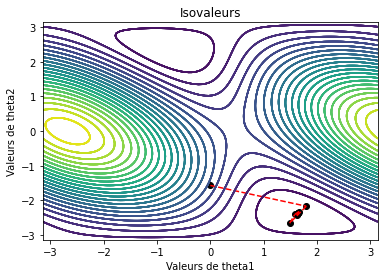

In [8]:
# Configuration articulaire initialle du robot 
ConfigInit =[0,-np.pi/2]
#Definition de la valeur initialle du pas de l'algorithme du griadient a pas fixe 
aplhaInit = 0.1
# Calcule du minimum de la fonction Rnorm
resultat , converge = GradienDecentAmeliore(ConfigInit,aplhaInit,Params,10e-4,100,IsoV=True,Disp=True)
print(f"les angles optimaux = {resultat} \nLe point X = {F(L1,L2,resultat[0],resultat[1])}")

La configuration articulaire du robot est montré ci-dessous :

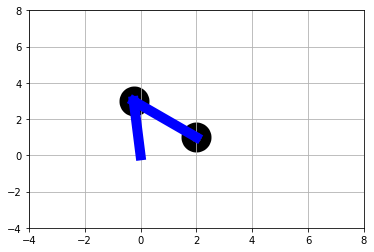

In [9]:
# La fonction animate permet d'afficher une representation graphique du robot a partir de configuration articulaire
animate(resultat,Params)
plt.grid()

La figure precedente montre que la position de l'organe terminale du robot initiallement defini peut etre atteinte avec une autre configuration articulaires, qui est la deuxieme solution du probleme.
Pour une position X a la limite du domaine atteignable du robot, il existe une position articulaire unique, ce qui veux dire la solution $\theta$ qui minimise $R_{norm}$ est unique.

 Iterations : 1 	 alpha = 0.0125 	 dX = 0.7115124735378854
 Iterations : 2 	 alpha = 0.025 	 dX = 0.3862157795564879
 Iterations : 3 	 alpha = 0.0125 	 dX = 0.06315217142797515
 Iterations : 4 	 alpha = 0.025 	 dX = 0.036250382810885884
 Iterations : 5 	 alpha = 0.025 	 dX = 0.012826397122035942
 Iterations : 6 	 alpha = 0.025 	 dX = 0.012803030655973966
 Iterations : 7 	 alpha = 0.025 	 dX = 0.013004378401628386
 Iterations : 8 	 alpha = 0.025 	 dX = 0.013474891183783535
 Iterations : 9 	 alpha = 0.025 	 dX = 0.014262809318168887
 Iterations : 10 	 alpha = 0.025 	 dX = 0.015423880321795655
 Iterations : 11 	 alpha = 0.025 	 dX = 0.01701079444437733
 Iterations : 12 	 alpha = 0.025 	 dX = 0.01909224695227727
 Iterations : 13 	 alpha = 0.025 	 dX = 0.02172857154437255
 Iterations : 14 	 alpha = 0.025 	 dX = 0.02501822624323251
 Iterations : 15 	 alpha = 0.0125 	 dX = 0.029040599518354752
 Iterations : 16 	 alpha = 0.025 	 dX = 0.016975411699252152
 Iterations : 17 	 alpha = 0.025 	 dX =

 Iterations : 135 	 alpha = 0.025 	 dX = 0.0016730289684040469
 Iterations : 136 	 alpha = 0.025 	 dX = 0.0019338139417653974
 Iterations : 137 	 alpha = 0.025 	 dX = 0.0022755991623159585
 Iterations : 138 	 alpha = 0.025 	 dX = 0.0027155836290144618
 Iterations : 139 	 alpha = 0.0125 	 dX = 0.003274228914454397
 Iterations : 140 	 alpha = 0.025 	 dX = 0.001988530414970793
 Iterations : 141 	 alpha = 0.025 	 dX = 0.0010282654076452092
 Iterations : 142 	 alpha = 0.025 	 dX = 0.0010709149632308129
 Iterations : 143 	 alpha = 0.025 	 dX = 0.0011365039952420772
 Iterations : 144 	 alpha = 0.025 	 dX = 0.0012329959097213676
 Iterations : 145 	 alpha = 0.025 	 dX = 0.0013697730642386542
 Iterations : 146 	 alpha = 0.025 	 dX = 0.0015575468201913126
 Iterations : 147 	 alpha = 0.025 	 dX = 0.001808345534725657
 Iterations : 148 	 alpha = 0.025 	 dX = 0.0021360231913371695
 Iterations : 149 	 alpha = 0.025 	 dX = 0.0025567720452453133
 Iterations : 150 	 alpha = 0.0125 	 dX = 0.0030904201744

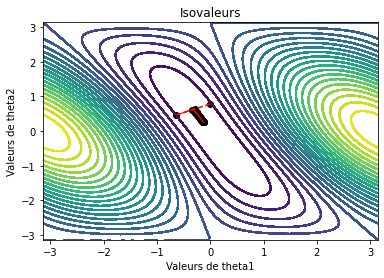

In [10]:
# Configuration articulaire initialle du robot 
ConfigInit =[0,np.pi/4]
#Definition de la valeur initialle du pas de l'algorithme du griadient a pas fixe 
aplhaInit = 0.025
# Position a la limite du domaine atteignable
X_limit = [6,0]
Params[2] = X_limit
# Calcule du minimum de la fonction Rnorm
resultat , converge = GradienDecentAmeliore(ConfigInit,aplhaInit,Params,10e-4,200,IsoV=True,Disp=True)
print(f"les angles optimaux = {resultat} \nLe point X = {F(L1,L2,resultat[0],resultat[1])}")

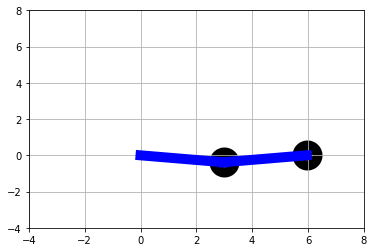

In [11]:
animate(resultat,Params)
plt.grid()

## Interpolation de Trajectoire avec la method du gradient
On applique la méthode du gradient sur une suite de points représentant une trajectoire. 

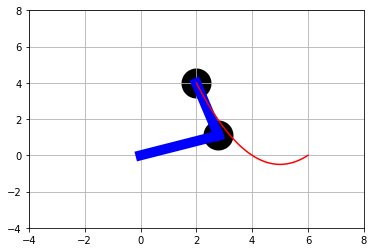

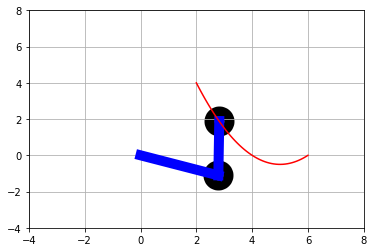

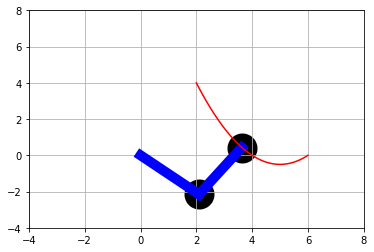

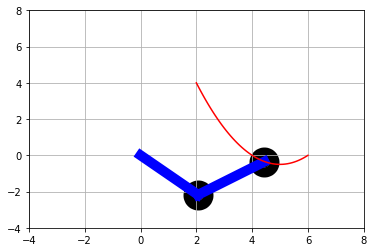

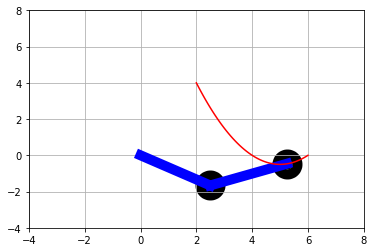

In [12]:
# Configuration initiale
ConfigInit = [-2,0] 
# Valeur initialle 
aplhaInit = 0.02

# Interpolation cubic
Xic = [2,4]
Xfc = [6,0]
Xmc = [3,1.5]
xc,yc=Interp(Xic,Xfc,N,traj="Cube",Xm=Xmc)

# Nombre de points intermediaires à afficher le robot
ptAfficher = 10 
ConfigAct = ConfigInit
plt.figure()
for i in  range(N): 
    X=[xc[i],yc[i]]
    Params[2] = X
    Solution,converge = GradienDecent(ConfigAct,aplhaInit,Params,10e-4,100)
    if (not converge ) : 
        break 
    if (i % ptAfficher == 0 ):
        animate(Solution,Params)
        plt.plot(xc,yc,'r', label = 'droite')
        plt.grid()
        plt.show()
    ConfigAct = Solution
       

Pour assurer le bon suivie de la trajectoire, la solution $\theta_n$ est passé comme configuration initiale au calcule de la solution $\theta_{n+1}$ du point $ X{n+1}$.
Et pour garantir la convergence du gradient pour la calcule de toutes les solutions des points de la trajectoire le pas $\alpha$ defini est relativement petit.

##  4) Méthode de Newton :
En utilisant la method de newton on va chercher a minimiser le carré de la norme du résidu.
Ce dernier est definis ainsi :
    $$ ||R(\Theta)||^{2}=(L_{1}cos(\theta_{1})+L_{2}cos(\theta_{1}+\theta_{2})-x)^{2} + (L_{1}sin(\theta_{1})+L_{2}sin(\theta_{1}+\theta_{2})-y)^{2} $$
    
$||R(\Theta)||^{2}$ definie de $R^{n}$ dans $R$ avec $\theta$ etant un vecteur de 2 valeurs: $\Theta=(\theta_{1},\theta_{2})$ ou $\theta_{1}$ est l'angle de la premiere articulation et $\theta_{2}$ l'angle de la 2eme articulation. du robot 2R .

Notre fonction est differentiable d'ordre $2$ ce qui nous permets de definir 2 parameters tres important pour la method de Newton:

1) Le gradient: $\nabla||R(\Theta)||^{2}$:
<table border="0">  <tr>    <tr>     <td>$$
\nabla ||R(\Theta)||^{2}=
\begin{pmatrix}
\frac{\partial ||R(\Theta)||^{2}}{\partial \theta_{1}}\\
\frac{\partial ||R(\Theta)||^{2}}{\partial \theta_{2}}
\end{pmatrix}
$$</td>     <td>$$
 =\begin{pmatrix}
2x(L1sin(\theta_{1})+L2sin(\theta_{1}+\theta_{2}))-2y(L1cos(\theta_{1})+L2cos(\theta_{1}+\theta_{2}))\\
-2L1L2sin(\theta_{2})+2xL2sin(\theta_{1}+\theta_{2})-2yL2.cos(\theta_{1}+\theta_{2})
\end{pmatrix}
$$</td>  </tr> </table> 
2) La hessienne:$H||R(\Theta)||^{2}$:

<table border="0">  <tr>    <tr>     <td>$$
H ||R(\theta)||^{2}=
\begin{pmatrix}
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{1}\theta_{1}}\\
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{1}\theta_{2}}\\
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{2}\theta_{1}}\\
\frac{\partial^{2} ||R(\Theta)||^{2}}{\partial \theta_{2}\theta_{2}}
\end{pmatrix}
$$</td>     <td>$$
 =\begin{pmatrix}
2x(L_{1}cos(\theta_{1})+L_{2}cos(\theta_{1}+\theta_{2}))+2y(L_{1}sin(\theta_{1})+L_{2}sin(\theta_{1}+\theta_{2}))\\
 2xL_{2}cos(\theta_{1}+\theta_{2})+2yL_{2}sin(\theta_{1}+\theta_{2})\\
 2xL_{2}cos(\theta_{1}+\theta_{2})+2yL_{2}sin(\theta_{1}+\theta_{2})\\
 -2L_{1}L_{2}cos(\theta_{2})+2xL_{2}cos(\theta_{1}+\theta_{2})+2yL_{2}sin(\theta_{1}+\theta_{2})
\end{pmatrix}
$$</td>  </tr> </table>

L'algorithm de newton se base sur l'equation :$\Theta_{n+1}=\Theta_{n}+\Delta\theta$ avec $\Delta\Theta$ comme solution de l'equation: $$H||R(\Theta_{n})||^{2}.\Delta\Theta=-\nabla||R(\Theta_{n})||^{2}$$

en apliquant cette technique pour un certain nombre d'itteration on se raprochera de plus en plus du <b>Minimum</b>

#### Convergence:
Si la fonction de cout $||R(\Theta)||^{2}$ est convexe dans la region etudié, et si on choisit $ \Theta_{0}$  assez proche de la solution, apres un certain nombre d'iteration $N$  la sequence $\Theta_{0},\Theta_{1},\Theta_{2},...,\Theta_{N}$  generées par la method Newton convergera au minimum $\Theta_{*}=\Theta_{N}$

#### Mise en garde sur l'utilisation de Newton 2D:
Si les condition de convergence ne sont pas respecté plusieurs soucis de performance sont à prevoir:
- La method peut ne pas converger du tout et entrer dans un cycle d'un point ou plusieurs points.
- Le point d'iteration peut etre sationnaire ce qui conduit à un blocage de la method sur en ce point.
- l'algorithm peut converger vers un point de selle au lieu d'un minimum local


### Implementation de la method de Newton:
ici on ilustre un exemple de la method de newton: <br>
On veut atteindre la position (3,0) avec $\Theta_{init}=(\pi/4,\pi/4)$. On peut voir en activant les isovaleurs que l'algorithm atteint bien sa destination apres 8 iteration en mettant l'argumant $Disp=True$ plus d'information seront affichées:

 Iterations : 1 	 |dtheta| = 2.449489742783178
 Iterations : 2 	 |dtheta| = 1.3094705645636342
 Iterations : 3 	 |dtheta| = 1.0622663924841673
 Iterations : 4 	 |dtheta| = 0.3177222711409134
 Iterations : 5 	 |dtheta| = 0.06949915588315234
 Iterations : 6 	 |dtheta| = 0.003045762403719338
 Iterations : 7 	 |dtheta| = 2.6799494532196675e-06
 Iterations : 8 	 |dtheta| = 4.286434866517271e-12
Minimum trouve apres 8 iterations
les angles optimaux = (-1.0471975511965976, 2.0943951023931953)
Le point (X,Y) = [3. 0.]


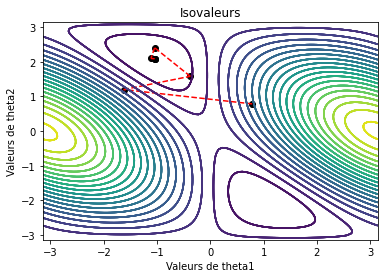

In [14]:
Params[2]=[3,0]
Angles,success=Newton([np.pi/4,np.pi/4],Params,0.0000001,100,Disp=True,IsoV=True)

#### Representation du Robot:

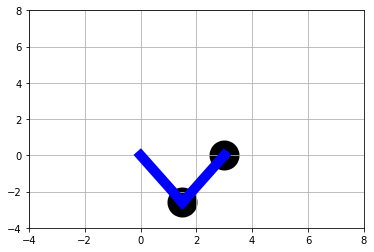

In [15]:
animate(Angles,Params)
plt.grid()

### Limitations de la method:
Comme dit precedement le choix du point initial ( ou dans notre cas le $\Theta_{init}$) est tres <b>critique </b> Ce dernier doit etre chosis minutieusement pour eviter de tomber dans les cas ou l'algorithm ne converge pas   <br>
Pour illustrer cela, on va garder la meme configuration initial $\Theta_{init}=(\pi/4,\pi/4)$ avec maintenant une position final de (3,2): 

 Iterations : 1 	 |dtheta| = 0.7219625036587618
 Iterations : 2 	 |dtheta| = 0.36830967025409683
 Iterations : 3 	 |dtheta| = 0.004080369594593711
 Iterations : 4 	 |dtheta| = 1.7903713016894857e-08
Minimum trouve apres 4 iterations
les angles optimaux = (0.5880026035475676, -1.722080748232873e-16)
Le point (X,Y) = [4.99230177 3.32820118]


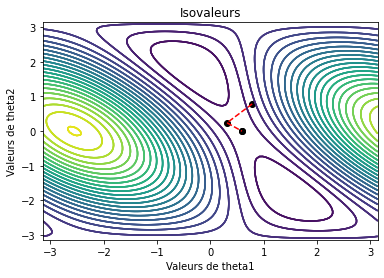

In [16]:
Params[2]=[3,2]
Angles,success=Newton([np.pi/4,np.pi/4],Params,0.0000001,100,Disp=True,IsoV=True)

##### Dans ce cas l'algorithm a atterri sur un point selle et non un minimum
<b> Remarque </b> : Le point initial choisis est beaucoup plus proche du point selle que du minimum local, ce qui a provoqué la non convergence de l'algorithm vers la solution désiré.<br>
On va essayer de reprenter la position du robot quand meme:

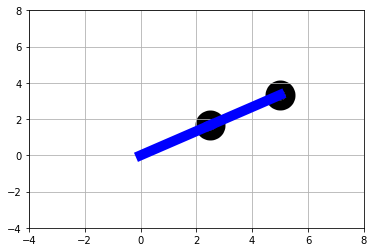

In [18]:
animate(Angles,Params)
plt.grid()

##### On remarque clairement qu'on est tres loin du (3,2) ...

## Interpolation de Trajectoire avec la method de Newton
On va implementer un mouvment lineaire du Robot . Le 2R devra aller du $(3,0)$ au point $(0,5)$ en passant par une trajectoire de la forme d'une ligne droite. 

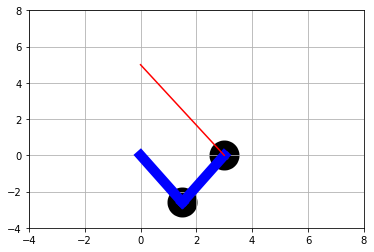

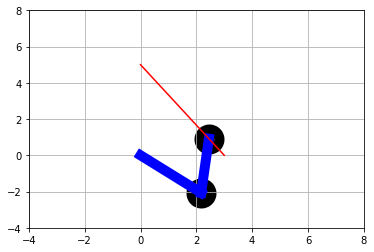

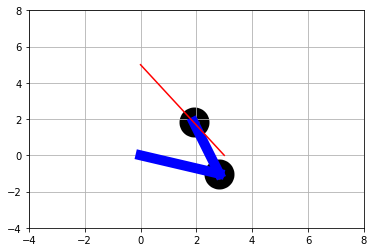

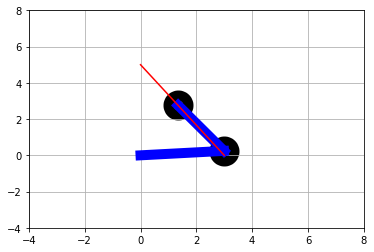

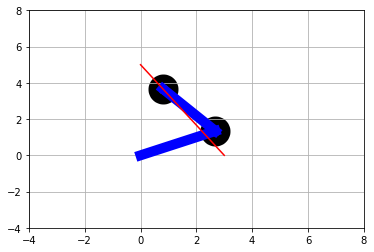

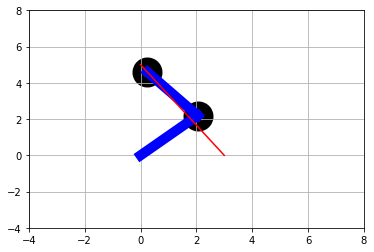

In [19]:
#Interpolation Lineaire
Xi=[3,0]
Xf=[0,5]
N=50
xl,yl=Interp(Xi,Xf,N)

# Configuration initiale
ConfigInit = [np.pi/4,np.pi/4] 
# Valeur initialle 

# Nombre de points intermediaires à afficher le robot
ptAfficher = 9 

ConfigAct = ConfigInit
plt.figure()
for i in  range(N): 
    X=[xl[i],yl[i]]
    Params[2] = X
    Solution,converge=Newton(ConfigAct,Params,0.0000001,100,Disp=False,IsoV=False)
    if (not converge ) : 
        break 
    if (i % ptAfficher == 0 ):
        animate(Solution,Params)
        plt.plot(xl,yl,'r', label = 'droite')
        plt.grid()
        plt.show()
    ConfigAct = Solution

# Interface pour le test des differentes methodes
La fonction suivante permet de determiner une position (X,Y) à atteindre par notre robot et de choisir une des qautres methodes d'optimisation pour retrouver la configuration articulaire correspendante.

In [3]:
#Veuillez executer la ligne de code suivante pour le test de la fonction
Interface(L1,L2)

Veuillez rentrer les coordonnées d'un point desirée : 
X :  2
Y :  3
Voulez vous vous voir un tracé des isovaleurs : [o/n]  :o
Veuillez rentrer la configuration intialle du robot
Theta1 : 1.5
Theta2 : 0
Selectionner une methode de resolution
1 : Scipy.Optimize  
2 : Scipy.Minimize 
3 : Gradient 
4 : Newton
 1
les angles optimaux = [0.05665552 1.8522764 ] 
Le point X = [2. 3.]
